In [1]:
# Dependencies
import requests
import json
from api_keys import api_key_FBI
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# the abbreviation of every state.
state_codes = pd.DataFrame({"Abbreviation": ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', "DC",
                                             'DE', 'FL', "FS", 'GA', "GM", 'HI', 'IA', "ID", 'IL', 'IN',
                                             'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
                                             'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV',
                                             'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
                                             'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
                                             'TX', 'UT', 'VT', 'VA', 'WA', "VI", 'WV', 'WI', 'WY']})

data_homicide = state_codes.copy()
data_homicide["Total Homicide"] = ""
data_homicide.head()


,Abbreviation,Total Homicide
0,AL,
1,AK,
2,AZ,
3,AR,
4,CA,


# INFORMATION OF FBI HOMICIDE OF 2021


In [3]:
for index, row in data_homicide.iterrows():
    try:
        # with this we get the information of FBI API
        state = row["Abbreviation"]
        base_url = f"https://api.usa.gov/crime/fbi/cde/shr/state/{state}/victim/sex?from=2021&to=2021&API_KEY={api_key_FBI}"
        # print(base_url)
        response = requests.get(base_url)
        response = response.json()

        data_homicide.loc[index, "Total Homicide"] = response["data"][0]["Unknown"] + \
            response["data"][0]["Male"]+response["data"][0]["Female"]
    except:
        data_homicide.loc[index, "Total Homicide"] = None

data_homicide.head(54)
# List all 54 states in order showing the number of total Homicides


,Abbreviation,Total Homicide
0,AL,309
1,AK,18
2,AZ,190
3,AR,321
4,CA,123
5,CO,358
6,CT,148
7,DC,109
8,DE,94
9,FL,None


In [4]:
data_homicide= data_homicide.dropna(how = "any")
data_homicide.head(50)


,Abbreviation,Total Homicide
0,AL,309
1,AK,18
2,AZ,190
3,AR,321
4,CA,123
5,CO,358
6,CT,148
7,DC,109
8,DE,94
11,GA,728


In [5]:
data_homicide["Total Homicide"] = data_homicide["Total Homicide"].astype(int)
data_homicide = data_homicide.sort_values("Total Homicide")
data_homicide.head(50)

,Abbreviation,Total Homicide
13,HI,6
47,VT,8
31,NH,14
36,ND,14
53,WY,17
1,AK,18
21,ME,18
43,SD,26
28,MT,31
15,ID,36


In [6]:
data_homicide["Abbreviation"]= data_homicide["Abbreviation"].astype(str)

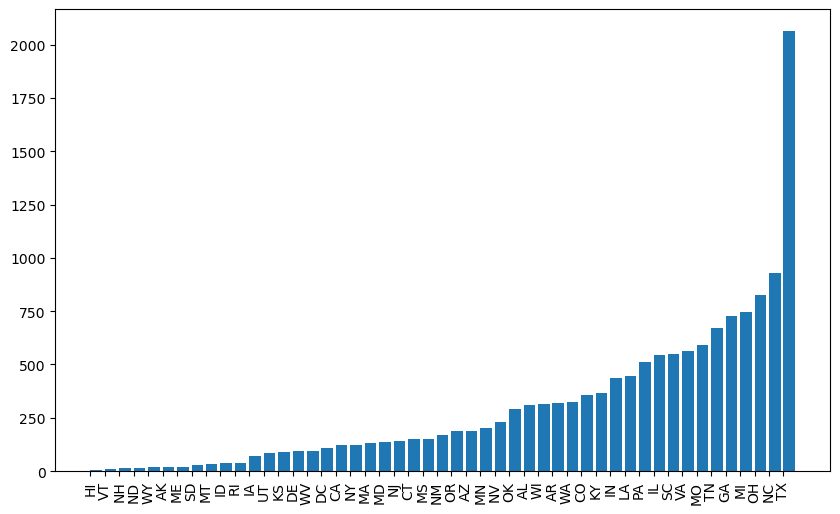

In [16]:
# # Generate a bar plot showing the total number of rows
# total_homicide_plot = data_homicide.plot(kind='bar', xlabel = "States", ylabel = "Number of Homcides", title = "Total Homicides by State")
# ax = total_homicide_plot
# ax.set_xticks(data_homicide["Abbreviation"])
plt.figure(figsize = (10, 6))
plt.bar(data_homicide["Abbreviation"], data_homicide["Total Homicide"], align = "edge")
plt.xticks(rotation = 90)
plt.show()

In [8]:
# Read in the census data
census_path = Path("Resources/census_data.csv")
census_df = pd.read_csv(census_path)
census_df.head(51)

,Abbreviation,State,Population
0,AL,Alabama,5039877
1,AK,Alaska,732673
2,AZ,Arizona,7276316
3,AR,Arkansas,3025891
4,CA,California,39237836
5,CO,Colorado,5812069
6,CT,Connecticut,3605597
7,DE,Delaware,1003384
8,DC,District of Columbia,670050
9,FL,Florida,21781128


In [9]:
# Merge with homicide data
homicide_plus_census = pd.merge(data_homicide, census_df, on = "Abbreviation", how = "inner", 
                    left_index=False, right_index=False)
homicide_plus_census["Population"] = homicide_plus_census["Population"].astype(int)
homicide_plus_census.head()

,Abbreviation,Total Homicide,State,Population
0,HI,6,Hawaii,1441553
1,VT,8,Vermont,645570
2,NH,14,New Hampshire,1388992
3,ND,14,North Dakota,774948
4,WY,17,Wyoming,578803


In [10]:
# Find the homicide rate per 100,000
homicide_plus_census["Homicide Rate (per 100,000)"] = (homicide_plus_census["Total Homicide"] / homicide_plus_census["Population"]) * 100000
homicide_plus_census.head(51)

,Abbreviation,Total Homicide,State,Population,"Homicide Rate (per 100,000)"
0,HI,6,Hawaii,1441553,0.416218
1,VT,8,Vermont,645570,1.239215
2,NH,14,New Hampshire,1388992,1.007925
3,ND,14,North Dakota,774948,1.806573
4,WY,17,Wyoming,578803,2.937096
5,AK,18,Alaska,732673,2.456758
6,ME,18,Maine,1372247,1.311717
7,SD,26,South Dakota,895376,2.903808
8,MT,31,Montana,1104271,2.807282
9,ID,36,Idaho,1900923,1.893817


In [14]:
# Sort by Homicide Rate
homicide_rate_df = homicide_plus_census.sort_values("Homicide Rate (per 100,000)")
homicide_rate_df.head()

,Abbreviation,Total Homicide,State,Population,"Homicide Rate (per 100,000)"
17,CA,123,California,39237836,0.313473
0,HI,6,Hawaii,1441553,0.416218
18,NY,124,New York,19835913,0.625129
2,NH,14,New Hampshire,1388992,1.007925
1,VT,8,Vermont,645570,1.239215


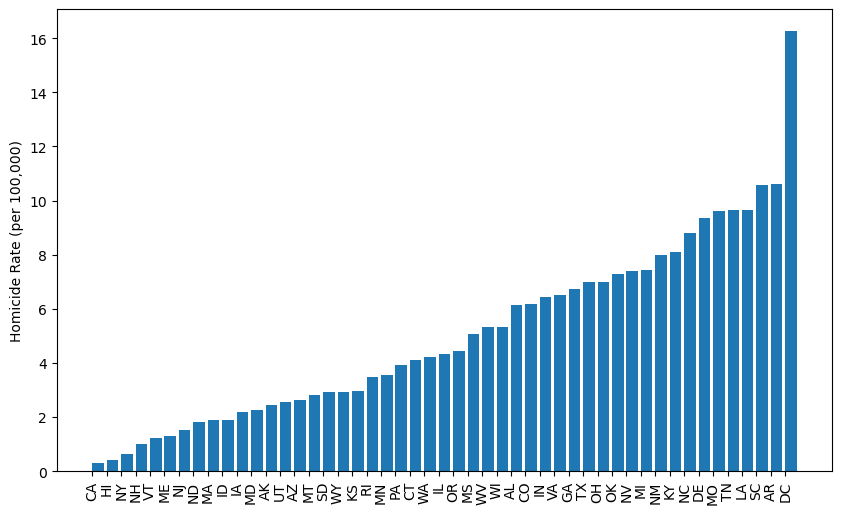

In [15]:
# Plot homicide rate for each state
plt.figure(figsize = (10, 6))
plt.bar(homicide_rate_df["Abbreviation"], homicide_rate_df["Homicide Rate (per 100,000)"], align = "edge")
plt.ylabel("Homicide Rate (per 100,000)")
plt.xticks(rotation = 90)
plt.show()

In [25]:
# want to get the statistical overview?
total_homicide_count_df.describe()


Abbreviation                
                      count unique top freq
Total Homicide                             
6                         1      1  HI    1
8                         1      1  VT    1
14                        2      2  NH    1
17                        1      1  WY    1
18                        2      2  AK    1
26                        1      1  SD    1
31                        1      1  MT    1
36                        1      1  ID    1
38                        1      1  RI    1
70                        1      1  IA    1
85                        1      1  UT    1
87                        1      1  KS    1
94                        1      1  DE    1
95                        1      1  WV    1
109                       1      1  DC    1
123                       1      1  CA    1
124                       1      1  NY    1
132                       1      1  MA    1
138                       1      1  MD    1
139                       1      1  NJ    1
148                       1      1  CT    1
149                       1      1  MS    1
169                       1      1  NM    1
188                       1      1  OR    1
190                       1      1  AZ    1
203                       1      1  MN    1
232                       1      1  NV    1
290                       1      1  OK    1
309                       1      1  AL    1
315                       1      1  WI    1
321                       1      1  AR    1
325                       1      1  WA    1
358                       1      1  CO    1
365                       1      1  KY    1
438                       1      1  IN    1
447                       1      1  LA    1
510                       1      1  PA    1
546                       1      1  IL    1
548                       1      1  SC    1
562                       1      1  VA    1
593                       1      1  MO    1
672                       1      1  TN    1
728                       1      1  GA    1
747                       1      1  MI    1
824                       1      1  OH    1
928                       1      1  NC    1
2064                      1      1  TX    1
N/A                       5      5  FL    1

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_homicide = data_homicide.groupby("States")
tumor_mean = total_homicide_count_df["Total Homicide"].mean()
tumor_median = total_homicide_count_df["Total Homicide"].median()
tumor_var = total_homicide_count_df["Total Homicide"].var()
tumor_stdev = total_homicide_count_df["Total Homicide"].std()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame(
    [tumor_mean, tumor_median, tumor_var, tumor_stdev, tumor_SEM]).T
summary_df.columns = ["Homicide Mean",
                      "Homicide Median",
                      "Homicide Variance",
                      "Homicide Std. Dev."]
summary_df


NameError: name 'data_homicide' is not defined

# INFORMATION OF COST LIVING


In [76]:
cost_living_data = pd.read_csv(
    "resources/cost-of-living-index-by-state-[updated-june-2023].csv")
cost_living_data["Rank"] = cost_living_data["2023"]
cost_living_data["State"] = cost_living_data["state"]
cost_living_data = cost_living_data.loc[:, ["State", "Rank"]]

cost_living_data.head()


,State,Rank
0,Hawaii,179.0
1,District of Columbia,148.7
2,Massachusetts,148.4
3,California,134.5
4,New York,125.1


# INFORMATION of HEALTH COST


In [39]:
health_data = pd.read_csv("resources/data-hGOWY.csv")
health_data.head()


,Rank,State,Score,% of adults reporting unmet need for mental health treatment in the past year who did not receive care because of cost,Health Care Spending Per Capita
0,1,South Dakota,100.00,47.10%,"$11,736"
1,2,Louisiana,86.69,32.00%,"$9,796"
2,3,West Virginia,82.31,39.50%,"$12,019"
3,4,Florida,79.51,51.90%,"$9,501"
4,5,Wyoming,78.63,64.70%,"$10,296"


In [41]:
states_USA = pd.read_csv("resources/states.csv")
states_USA.head()


,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [86]:
resume = pd.merge(
    states_USA, health_data[["Rank", "State"]], on="State", how="inner")
resume = resume.rename(columns={"Rank": "Healthcare Rank"})
resume.head()


,State,Abbreviation,Rank
0,Alabama,AL,28
1,Alaska,AK,12
2,Arizona,AZ,13
3,Arkansas,AR,33
4,California,CA,32


In [88]:
resume = pd.merge(resume, cost_living_data, on="State", how="inner")
resume.head()


,State,Abbreviation,Rank_x,Rank_y
0,Alabama,AL,28,88.8
1,Alaska,AK,12,124.4
2,Arizona,AZ,13,107.2
3,Arkansas,AR,33,90.3
4,California,CA,32,134.5


In [91]:
resume = pd.merge(resume, data_homicide, on="Abbreviation", how="inner")
resume.head()


,State,Abbreviation,Rank_x,Rank_y,Total Homicide
0,Alabama,AL,28,88.8,309
1,Alaska,AK,12,124.4,18
2,Arizona,AZ,13,107.2,190
3,Arkansas,AR,33,90.3,321
4,California,CA,32,134.5,123
